In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [30]:
df = pd.read_csv("../data/reviews_cleaned.csv", usecols=[2,3,4,5])
df.drop_duplicates(inplace=True)
df.rating = df.rating.astype(float)

In [31]:
df

,language,rating,category,combined_text
0,russian,5.0,beauty,хороший фен свой деньги . очень приятный цвет .
1,russian,5.0,beauty,отличный большой фен ! четко ! нет негатив !
2,russian,5.0,beauty,"мощный , самый главный . тонкий шнур ."
3,russian,5.0,beauty,отличный машинка .
4,russian,5.0,beauty,"точно , описание . очень простой использовани..."
...,...,...,...,...
169761,russian,3.0,wearables,"браслет не такой , все ) цена , мало функци..."
169762,russian,5.0,wearables,"классный , надежный девайс"
169763,russian,5.0,wearables,браслет очень понравиться . функция много . мо...
169764,russian,5.0,wearables,"хорошо , быстро доставлять"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152448 entries, 0 to 169765
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   language       152446 non-null  object 
 1   rating         152445 non-null  float64
 2   category       152445 non-null  object 
 3   combined_text  152405 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.8+ MB


In [33]:
df.rating.describe()

count    152445.000000
mean          4.680547
std           0.839342
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [34]:
df.rating.unique()

array([ 5.,  3.,  4.,  2.,  1., nan])

In [35]:
documents = df.combined_text.dropna().values

In [36]:
PUNCTUATION = {
    "$",
    "=",
    "_",
    "?",
    ")",
    "*",
    "[",
    "(",
    "{",
    "'",
    "\\",
    ",",
    ":",
    ";",
    "|",
    "+",
    "`",
    ".",
    "<",
    "@",
    "%",
    "#",
    '"',
    "^",
    "&",
    ">",
    "}",
    "~",
    "/",
    "!",
    "]",
    "-",
    " ",
    "",
}

In [37]:
bag_of_words = {}

In [38]:
for review in documents:
    
    words = review.split()
    for word in words:
        if not word.isalpha():
            continue

        bag_of_words[word] = bag_of_words.get(word, 0) + 1
        

In [39]:
sorted_1grams = sorted(bag_of_words.items(), key=lambda x: -x[1])

In [40]:
bag_of_2grams = {}

In [41]:
for review in documents:
    words = review.split()
    res = []
    for word in words:
        if not word.isalpha() or word in PUNCTUATION:
            continue
        res.append(word)
        
    for i, word in enumerate(res):
        if i == 0:
            continue
            
        bigram = f"{res[i-1]} {word}"
        bag_of_2grams[bigram] = bag_of_2grams.get(bigram, 0) + 1

In [42]:
sorted_2grams = sorted(bag_of_2grams.items(), key=lambda x: -x[1])

In [72]:
top_5_pairs = list(dict(sorted_2grams).keys())[:8]
top_5_pairs_count = list(dict(sorted_2grams).values())[:8]

[Text(0, 0, 'очень понравиться'),
 Text(0, 0, 'очень хороший'),
 Text(0, 0, 'очень удобный'),
 Text(0, 0, 'спасибо каспи'),
 Text(0, 0, 'очень довольный'),
 Text(0, 0, 'свой деньги'),
 Text(0, 0, 'цена качество'),
 Text(0, 0, 'хороший телефон')]

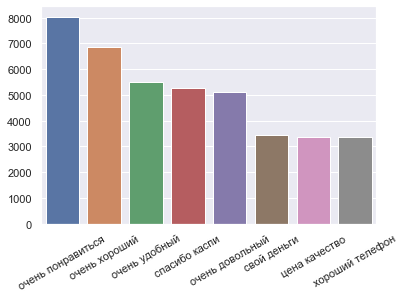

In [73]:
top_words = sns.barplot(x=top_5_pairs, y=top_5_pairs_count)
top_words.set_xticklabels(top_5_pairs, rotation=30)

In [57]:
bag_of_neg_2grams = {}

In [58]:
neg_documents = df[df.rating <= 3].combined_text.dropna().values

In [61]:
for review in neg_documents:
    words = review.split()
    res = []
    for word in words:
        if not word.isalpha() or word in PUNCTUATION:
            continue
        res.append(word)
        
    for i, word in enumerate(res):
        if i == 0:
            continue
            
        bigram = f"{res[i-1]} {word}"
        bag_of_neg_2grams[bigram] = bag_of_neg_2grams.get(bigram, 0) + 1

In [63]:
sorted_neg_2grams = sorted(bag_of_neg_2grams.items(), key=lambda x: -x[1])

In [70]:
neg_top_5_pairs = list(dict(sorted_neg_2grams).keys())[:8]
neg_top_5_pairs_count = list(dict(sorted_neg_2grams).values())[:8]

[Text(0, 0, 'не понравиться'),
 Text(0, 0, 'не очень'),
 Text(0, 0, 'не советовать'),
 Text(0, 0, 'не стоить'),
 Text(0, 0, 'не работать'),
 Text(0, 0, 'вообще не'),
 Text(0, 0, 'не рекомендовать'),
 Text(0, 0, 'не мочь')]

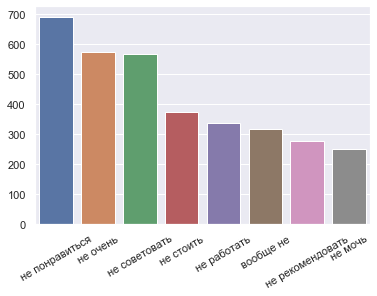

In [71]:
top_neg_words = sns.barplot(x=neg_top_5_pairs, y=neg_top_5_pairs_count)
top_neg_words.set_xticklabels(neg_top_5_pairs, rotation=30)